In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags
import xarray as xr
import pandas as pd
import geopy.distance


336


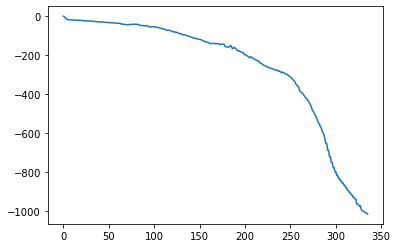

In [17]:
ds = xr.open_dataset('gebco_2023_n38.3_s38.2_w140.0_e142.369.nc')
depth = ds['elevation'][1,:]
depth = depth[depth.values < 0]
plt.plot(depth)
print(len(depth))

In [30]:
coords_1 = (depth.lat, depth.lon[0])
coords_2 = (depth.lat, depth.lon[-1])
total_dist = geopy.distance.geodesic(coords_1, coords_2).km
dx = total_dist/len(depth)
print(dx, 'km')

0.3671099741493605 km


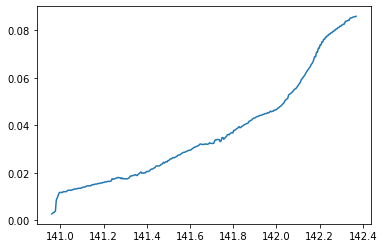

In [35]:
nx = len(depth)
nt = 10000

tf = 100

x = depth.lon
t = np.linspace(0,tf,nt)

dt = t[1]-t[0]



#changing wave speed

gravity = 9.81 #m/s
g = gravity / 1000 #km/s

alpha = np.sqrt(abs(depth*g))
lam = alpha*dt/dx

plt.plot(x,lam)

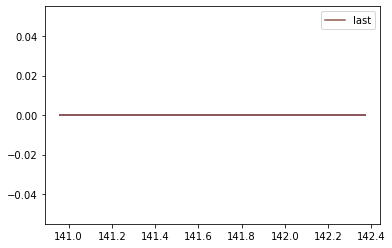

In [36]:
u = np.nan*np.ones([nx,nt])
u[:,0] = np.exp(-(x**2) / 2) #initializing first two time steps cux we have k-1
u[:,1] = np.exp(-(x**2) / 2)

data = np.array([(lam**2)*np.ones(nx), 2*(1-lam**2)*np.ones(nx), (lam**2)*np.ones(nx)])
diags = np.array([-1, 0, 1])
M = spdiags(data, diags, nx, nx).toarray()

#Reflective BC
M[0,0] = 2-lam[0]**2
M[-1,-1] = 2-lam[-1]**2

for k in np.arange(nt-2):
    u[:,k+2] = np.matmul(M,u[:,k+1]) - u[:,k]
    
plt.plot(x, u[:,0])
plt.plot(x, u[:,1000])
plt.plot(x, u[:,2500])
plt.plot(x, u[:,5000])
plt.plot(x, u[:,7500])
plt.plot(x, u[:,-1],label='last')
plt.legend()